In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ast

In [362]:
%%markdown
# Reading in the scraped Armond White reviews
Source: https://www.rottentomatoes.com/critics/armond-white/movies
        
Scraped on 30 JUL 2023

# Reading in the scraped Armond White reviews
Source: https://www.rottentomatoes.com/critics/armond-white/movies
        
Scraped on 30 JUL 2023


In [363]:
df = pd.read_csv('armond_white.csv')
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Unnamed: 0,Armond Review,Tomatometer Review,Tomatometer Score,Quote,Publication Name,Movie,Date
0,0,rotten,certified-fresh,94.0,"Because Nolan’s politics are always obscure, i...",National Review,Oppenheimer,2023-07-21
1,1,rotten,certified-fresh,88.0,"Frantic, uncheerful, and graceless, Barbie sym...",National Review,Barbie,2023-07-20
2,2,rotten,certified-fresh,96.0,Reducing cinema to gimmicky sensationalism is ...,National Review,"Mission: Impossible - Dead Reckoning, Part One",2023-07-14
3,3,rotten,certified-fresh,78.0,The Lesson is an appalling example of our mora...,National Review,The Lesson,2023-07-14
4,4,rotten,fresh,69.0,The thrill is gone. Not that Raiders absolutis...,National Review,Indiana Jones and the Dial of Destiny,2023-07-01


In [364]:
df.columns

Index(['Unnamed: 0', 'Armond Review', 'Tomatometer Review',
       'Tomatometer Score', 'Quote', 'Publication Name', 'Movie', 'Date'],
      dtype='object')

In [365]:
print(f'There are {len(df)} reviews')

There are 1213 reviews


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1213 non-null   int64         
 1   Armond Review       1213 non-null   object        
 2   Tomatometer Review  1196 non-null   object        
 3   Tomatometer Score   1196 non-null   float64       
 4   Quote               1213 non-null   object        
 5   Publication Name    1213 non-null   object        
 6   Movie               1213 non-null   object        
 7   Date                1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 75.9+ KB


In [367]:
%%markdown
# Normalizing Tomatometer Ratings
For the next few cells, we'll call "Certified Fresh" just "fresh" so that they can be compared side by side with Armond's reviews

# Normalizing Tomatometer Ratings
For the next few cells, we'll call "Certified Fresh" just "fresh" so that they can be compared side by side with Armond's reviews


In [368]:
normalization_mapping = {
    "rotten": "rotten",
    "fresh": "fresh",
    "certified-fresh": "fresh"  # Map "certified-fresh" to "fresh"
}

# Normalize the ratings in the DataFrame using the mapping
df["Normalized Tomatometer Review"] = df["Tomatometer Review"].map(normalization_mapping)
df.head()

,Unnamed: 0,Armond Review,Tomatometer Review,Tomatometer Score,Quote,Publication Name,Movie,Date,Normalized Tomatometer Review
0,0,rotten,certified-fresh,94.0,"Because Nolan’s politics are always obscure, i...",National Review,Oppenheimer,2023-07-21,fresh
1,1,rotten,certified-fresh,88.0,"Frantic, uncheerful, and graceless, Barbie sym...",National Review,Barbie,2023-07-20,fresh
2,2,rotten,certified-fresh,96.0,Reducing cinema to gimmicky sensationalism is ...,National Review,"Mission: Impossible - Dead Reckoning, Part One",2023-07-14,fresh
3,3,rotten,certified-fresh,78.0,The Lesson is an appalling example of our mora...,National Review,The Lesson,2023-07-14,fresh
4,4,rotten,fresh,69.0,The thrill is gone. Not that Raiders absolutis...,National Review,Indiana Jones and the Dial of Destiny,2023-07-01,fresh


In [369]:
# Calculate percent agreement matrix
percent_agreement_matrix = (pd.crosstab(df["Armond Review"], 
                                       df["Normalized Tomatometer Review"], 
                                       normalize='index') * 100).round(1)
percent_agreement_matrix

Normalized Tomatometer Review,fresh,rotten
Armond Review,,
fresh,74.7,25.3
rotten,68.5,31.5


In [370]:
%%markdown
# Armond's Percent Agreement
Armond has a decent agreement with RT for Fresh ratings.

Armond's rotten ratings are often contrarian, disagreeing a good 68.5 percent from RT.

# Armond's Percent Agreement
Armond has a decent agreement with RT for Fresh ratings.

Armond's rotten ratings are often contrarian, disagreeing a good 68.5 percent from RT.


In [371]:
percent_agreement = (percent_agreement_matrix['fresh'][0] + percent_agreement_matrix['rotten'][1]) / 2
percent_agreement

53.1

In [372]:
%%markdown
# Armond's Agreeability with Rotten Tomatoes
On Average, Armond **agrees** with Rotten Tomatoes **53.1% of the time**.

# Armond's Agreeability with Rotten Tomatoes
On Average, Armond **agrees** with Rotten Tomatoes **53.1% of the time**.


In [373]:
high_tomatometer = df[df['Tomatometer Score'] > 89]
low_tomatometer = df[df['Tomatometer Score'] < 21]


In [374]:
percent_agreement_matrix = pd.crosstab(high_tomatometer["Armond Review"], 
                                       high_tomatometer["Normalized Tomatometer Review"])
percent_agreement_matrix

Normalized Tomatometer Review,fresh
Armond Review,
fresh,152
rotten,172


In [375]:
contrarian_percent = (percent_agreement_matrix['fresh']['rotten']/sum(percent_agreement_matrix['fresh']))*100
contrarian_percent.round(2)

53.09

In [376]:
%%markdown
# Armond and "Certified Fresh" Rotten Tomato Reviews
When faced with overwhelming positive, rave reviews, Armond will disagree with contrarianism 53.1% of the time

# Armond and "Certified Fresh" Rotten Tomato Reviews
When faced with overwhelming positive, rave reviews, Armond will disagree with contrarianism 53.1% of the time


In [377]:
percent_agreement_matrix = pd.crosstab(low_tomatometer["Armond Review"], 
                                       low_tomatometer["Normalized Tomatometer Review"])
percent_agreement_matrix

Normalized Tomatometer Review,rotten
Armond Review,
fresh,17
rotten,26


In [378]:
optimistic_percent = (percent_agreement_matrix['rotten']['fresh']/sum(percent_agreement_matrix['rotten']))*100
optimistic_percent.round(1)

39.5

In [379]:
%%markdown
# Armond and "Overwhelmingly Rotten" Rotten Tomato Reviews

When faced with overwhelming negative critics, Armond will disagree with optimism 
39.5% of the time

# Armond and "Overwhelmingly Rotten" Rotten Tomato Reviews

When faced with overwhelming negative critics, Armond will disagree with optimism 
39.5% of the time


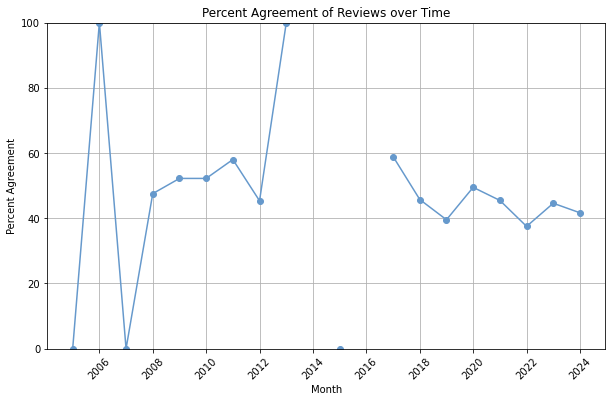

In [380]:
def agreement_over_time(df, binning='M',color='#6699CC', title="Percent Agreement of Reviews over Time"):
    
    df = df.copy()
    
    df.index = df['Date']
    df['Agreement'] = df['Armond Review'] == df['Normalized Tomatometer Review']
    percent_agreement_by_month = df.resample(binning)['Agreement'].mean() * 100

    plt.figure(figsize=(10, 6))
    plt.plot(percent_agreement_by_month.index, percent_agreement_by_month.values, marker='o', linestyle='-', color=color)
    plt.xlabel('Month')
    plt.ylabel('Percent Agreement')
    plt.title(title)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.show()

agreement_over_time(df, binning="Y")

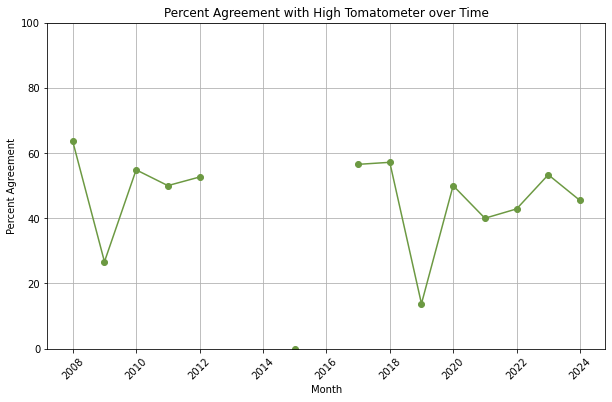

In [381]:
agreement_over_time(high_tomatometer, binning="Y",color='#6c9942', title="Percent Agreement with High Tomatometer over Time")

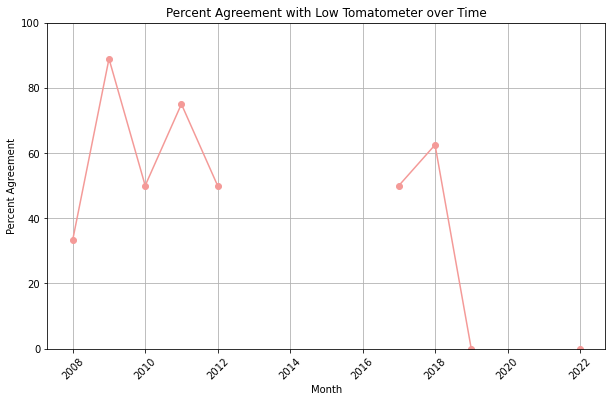

In [382]:
agreement_over_time(low_tomatometer, binning="Y",color='#f49a98', title="Percent Agreement with Low Tomatometer over Time")

In [383]:
import requests
import keyring
import json

key = keyring.get_password(service_name='themoviedb_key',username='themoviedb_key')

genre_dict = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}
    

response = requests.get(url=f'https://api.themoviedb.org/3/search/movie?api_key={key}&query=the+avengers')
json.loads(response.text)['results']

def get_genre_from_query(movie_name):
    response = requests.get(url='https://api.themoviedb.org/3/search/movie',
                           params={'api_key':key,
                                  'query':movie_name})
    if response.status_code != 200:
        print(response)
        return ['Unable to query']
    
    genre_set = set()
    
    # Maybe just get the first result?

    
    try:
        first_genres =  json.loads(response.text)['results'][0]
    except:
        return ["No Results"]
    
    for g in first_genres['genre_ids']:
        genre_set.add(int(g))

    return [genre_dict[x] for x in genre_set]
    

    




In [384]:
get_genre_from_query('Barbie')

['Comedy', 'Adventure', 'Fantasy']

In [385]:
# API Call to get genres from movie database.
# I stored these results as armond_with_genres.csv...

#df['Genres'] = df['Movie'].apply(get_genre_from_query)

In [386]:
df = pd.read_csv('armond_with_genres.csv')

# Convert the 'category1' column back to a Series of lists
df['Genres'] = df['Genres'].apply(ast.literal_eval)

In [387]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Armond Review,Tomatometer Review,Tomatometer Score,Quote,Publication Name,Movie,Date,Genres
0,0,0,rotten,certified-fresh,94.0,"Because Nolan’s politics are always obscure, i...",National Review,Oppenheimer,2023-07-21,"[Drama, History]"
1,1,1,rotten,certified-fresh,88.0,"Frantic, uncheerful, and graceless, Barbie sym...",National Review,Barbie,2023-07-20,"[Comedy, Adventure, Fantasy]"
2,2,2,rotten,certified-fresh,96.0,Reducing cinema to gimmicky sensationalism is ...,National Review,"Mission: Impossible - Dead Reckoning, Part One",2023-07-14,"[Thriller, Action, Adventure, Science Fiction]"
3,3,3,rotten,certified-fresh,78.0,The Lesson is an appalling example of our mora...,National Review,The Lesson,2023-07-14,"[Drama, Thriller]"
4,4,4,rotten,fresh,69.0,The thrill is gone. Not that Raiders absolutis...,National Review,Indiana Jones and the Dial of Destiny,2023-07-01,"[Adventure, Action, Fantasy]"


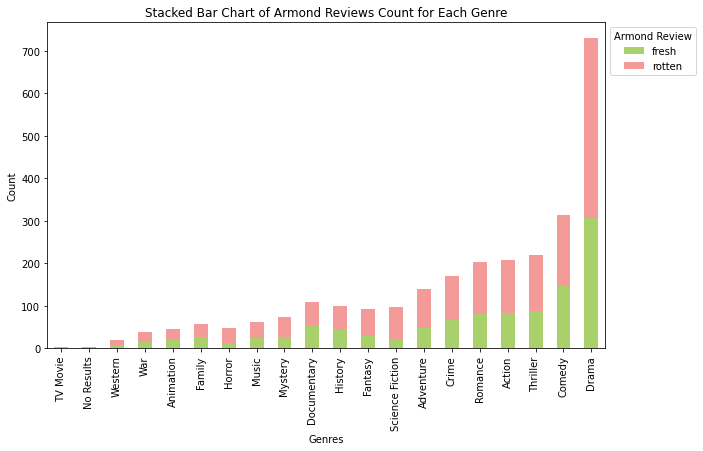

In [388]:
# Create a new DataFrame with the counts of category2 for each list in category1
count_df = df.explode('Genres').groupby(['Genres', 'Armond Review']).size().unstack(fill_value=0)

count_df = count_df.sort_values(by='rotten')

# Define custom colors for each category
colors = ['#a9d06b', '#f49a98']

# Create a custom colormap
cmap = mcolors.ListedColormap(colors)
# Plot the stacked bar chart
ax = count_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Armond Reviews Count for Each Genre')

# Show the legend
plt.legend(title='Armond Review', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

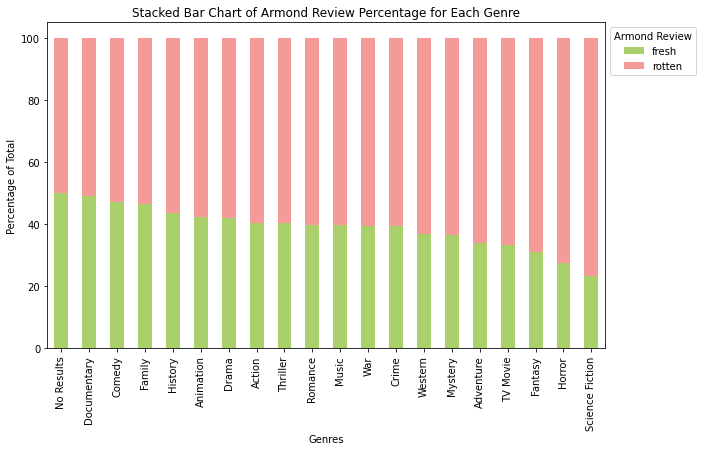

In [389]:
# Create a new DataFrame with the counts of category2 for each list in category1
count_df = df.explode('Genres').groupby(['Genres', 'Armond Review']).size().unstack(fill_value=0)

# Calculate the percentage of the total for each genre
count_df_percentage = count_df.div(count_df.sum(axis=1), axis=0) * 100

count_df_percentage = count_df_percentage.sort_values(by='rotten')

# Define custom colors for each category
colors = ['#a9d06b', '#f49a98']

# Create a custom colormap
cmap = mcolors.ListedColormap(colors)

# Plot the stacked bar chart
ax = count_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Percentage of Total')
plt.title('Stacked Bar Chart of Armond Review Percentage for Each Genre')

# Show the legend
plt.legend(title='Armond Review', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [390]:
count_df_percentage

Armond Review,fresh,rotten
Genres,,
No Results,50.000000,50.000000
Documentary,49.090909,50.909091
Comedy,47.133758,52.866242
Family,46.551724,53.448276
History,43.564356,56.435644
Animation,42.222222,57.777778
Drama,42.134063,57.865937
Action,40.384615,59.615385
Thriller,40.271493,59.728507


In [391]:
count_df

Armond Review,fresh,rotten
Genres,,
Action,84,124
Adventure,48,93
Animation,19,26
Comedy,148,166
Crime,67,103
Documentary,54,56
Drama,308,423
Family,27,31
Fantasy,29,64


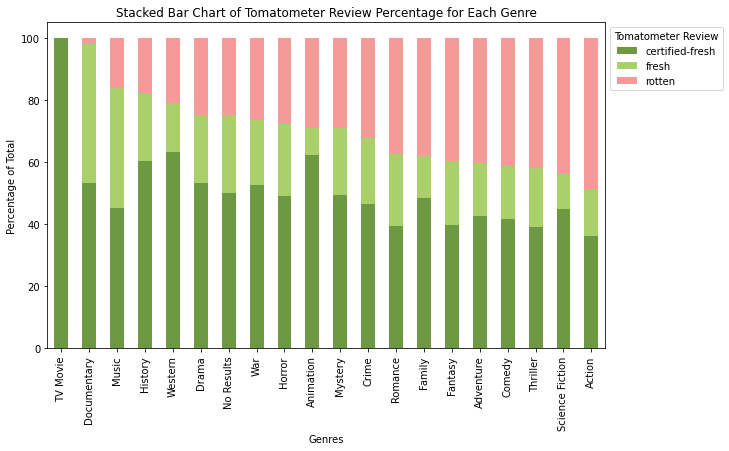

In [392]:
# Create a new DataFrame with the counts of category2 for each list in category1
count_df = df.explode('Genres').groupby(['Genres', 'Tomatometer Review']).size().unstack(fill_value=0)

# Calculate the percentage of the total for each genre
count_df_percentage = count_df.div(count_df.sum(axis=1), axis=0) * 100

count_df_percentage = count_df_percentage.sort_values(by='rotten')

# Define custom colors for each category
colors = ['#6c9942', '#a9d06b', '#f49a98']

# Create a custom colormap
cmap = mcolors.ListedColormap(colors)

# Plot the stacked bar chart
ax = count_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Percentage of Total')
plt.title('Stacked Bar Chart of Tomatometer Review Percentage for Each Genre')

# Show the legend
plt.legend(title='Tomatometer Review', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()